## <h3 align="center"> __Johns Hopkins University__</h3>
## <h3 align="center">__Whiting School of Engineering__</h3>
## <h3 align="center">__Engineering for Professionals__</h3>
## <h3 align="center">__685.621 Algorithms for Data Science__</h3>
## <h3 align="center">__Homework 4__</h3>
## <h3 align="center">__Assigned at the start of Module 10__</h3>
## <h3 align="center">__Due at the end of Module 12__</h3><br>
## <h3 align="center">__Total Points 100/100__</h3>
Collaboration groups are being set up in Canvas. Make sure your group starts one thread for each
problem. You are required to participate in Problem 1. The goal is for the group to develop a solution
after everyone has participated in Problem 1 discussion. You can start a discussion thread for Problem
2, however, do not post a complete solution. You must submit your own solutions for both problems.

In [227]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold

# __1 - Module 10 Note this is a Collaborative Problem.__<br>
*50 Points Total*<br><br>

The RBF NN algorithm is to be used for classification of the Iris data set. In this problem the
following subproblems are to be completed:<br><br>

1. [10 points] Using the RBF in Section 2 of the Neural Network documentation develop in
pseudocode an RBF NN (no bias) system to accomplish the following steps:<br><br>
    - Develop (pseudocode) an RBF NN train/training function.
    - Develop (pseudocode) an RBF NN classification function.<br><br>
2. Optional no need to discuss collaboratively - Analyze your design<br><br>
    - Calculate the running time of the system above in O-notation.
    - Calculate the total running time of the above system as T(n) with each line of pseudocode or code accounted for.
    - How does the total running time T(n) compare to the running time in O-notation?<br><br>
3. [40 points] Implement your developed RBF NN using Python.<br><br>
    - Train three two class models using the Iris data set as input training data, the Iris data will need to be reconfigured as a one-vs-all or one-vs-one data set. For example, one vs all will have class 1 as setosa and class 2 as versicolor and virginica. 
    - Process the test data set to determine which class each test observation belongs to, in this problem you will simply use all 150 observations as your test data.
    - What is the classification accuracy of your design?
    - If you had any misclassifications what was the cause of this, e.g., did the spread have an impact?

### 1.

#### RBF Neural Network Training Psuedocode
1. Randomly set weights, `w`, and biases, `b`.
2. Randomly set the centers of the Radial Basis functions based on the random elements of the input data, `X`.
3. For each epoch, set the hidden matrix, `H`, to zero. Then iterate through each observation and number of centers. Pass each observation, `x`, and `center`--with a given spread-- into the radial basis function.
4. Compute the prediction as `Hw +b`
5. Based on the predictions and ground truth labels, `y`, find the errors (`y - predictions`)
6. Add the residual errors to the weights multiplied by the learning rate, `lr`. `w+= lr * H.T * errors
7. Correct the biases by adding the squared error multipled by the learning rate
8. Output the `centers`, weights (`w`), and biases (`b`).

#### RBF Neural Network Classification Psuedocode
1. Allow the function to take input test data (`X`), radial basis centers, weights, biases, and `spread` as inputs
2. Compute the `H` matrix based on an individual observation `x`, `center` of the basis function, and `spread`.
3. Our predictions are computed as `Hw + b`
4. Return where the `predictions < 0.5` as `0` and the latter as `1`

### 2.

### Time Complexity of RBF Training
1. First, randomly setting the weights is based on the number of centers, let's call this `M`, and the number of observations, `N`. This will take $\Theta(N \cdot M)$ time. Similar, the biases will depend on the number of observations in our datam resulting in $\Theta(N)$. Similarly, setting the the centers will take $\Theta(N \cdot M)$. Setting the value at $H_{ij}$ depends on the number of epochs, number of centers, and number of observations. This results in $\Theta(\epsilon \cdot M \cdot N)$, where $\epsilon$ is the number of epochs. The predictions are created resulting in $\Theta(M \cdot N)$. The error is dependent on the number of observations, $\Theta(N)$. The weights are incremental updated based on `H`, resulting in $\Theta(M \cdot N)$. Last the biases are updated based on the summed error of the errors, $\Theta(N^2)$. Overall the worse cost is $O(\epsilon \cdot M \cdot N)$.
2. While the total running time is $2T(N) + 4T(N \cdot M) + T(N^2) + T(\epsilon \cdot N \cdot M)$.
3. The worse case time is similar in magnitude to the total running time. But the total running time gives a better estimate of how long the algorithm may actually take

### Time Complexity of RBF Classification
1. Assuming the classifier takes in a test piece of data, weights, biases, and a spread. The classification first begins by setting a matrix of the hidden values, `H`. This is achieved in $\Theta(N \cdot M)$, assuming `N` is the number of observations and `M` is the number of RBF centers. Next, `H` is evaluated at indices `i` and `j`. This is achieved at $\Theta(N \cdot M)$. A prediction is created by $Hw +b$ -- $\Theta(N \cdot M) + \Theta(N)$. And the result is returned as `0` or `1` with a cost of $\Theta(N). Overall this results in a worst case of $O(N \cdot M)$.
2. This also results in a total running time of $3T(N \cdot M ) + 2T(N)$.
3. The worse case time is similar in magnitude to the total running time. But the total running time gives a better estimate of how long the algorithm may actually take

### 3.

In [229]:
iris_df = pd.read_csv("iris.csv")

In [230]:
X = iris_df.iloc[:, :4].values

In [231]:
y = iris_df["species"].values

Let's create the Radial Basis Function that we will uses as the activation function for our feedforward network

In [232]:
def rbf(x, center, sigma):
    return np.exp(-np.linalg.norm(x-center)**2 / (2 * sigma**2))

Let's create our function that will train our Neural Network. This will run with a defined learning rate: `lr` and number of `epochs`. The `centers`, standard deviations (`sigma`), `weights`, and `bias`

In [233]:
## Type the code for part 3 here ##
def rbfTrain(X, y, n_centers, lr=0.01, epochs=100, spread=0.5):

    N, D = X.shape

    # randomly set the centers
    random_indices = np.random.choice(N, n_centers, replace=False)
    centers = X[random_indices]
    
    # Initialize weights and bias
    w = np.random.randn(n_centers)
    b = np.random.randn()
    
    for epoch in range(epochs):
        H = np.zeros((N, n_centers))
        for i, x in enumerate(X):
            for j, center in enumerate(centers):
                H[i, j] = rbf(x, center, spread)
        
        predictions = H @ w + b
        errors = y - predictions
        #print(errors)
        w += lr * H.T @ errors
        b += lr * errors.sum()
    
    return centers, w, b

In [234]:
def rbfClassify(X, centers, w, b, spread=0.5):
    H = np.zeros((X.shape[0], len(centers)))
    for i, x in enumerate(X):
        for j, center in enumerate(centers):
            H[i, j] = rbf(x, center, spread)
    
    predictions = H @ w + b

    return np.where(predictions < 0.5, 0, 1)

#### Setosa vs. Versicolor Classifier

In [235]:
idx = np.where(np.isin(y, ["setosa", "versicolor"]))
df_setosa_versicolor = iris_df.iloc[idx]
X_setosa_versicolor = df_setosa_versicolor.iloc[:, :4].values
y_setosa_versicolor = df_setosa_versicolor.iloc[:, -1]
y_setosa_versicolor = np.where(y_setosa_versicolor == "setosa", 0, 1)

In [236]:
X_setosa_versicolor

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [237]:
y_setosa_versicolor

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

We should split this data using K-folds to train and test our model

In [238]:
kf = KFold(n_splits=5, shuffle=True, random_state=20)

In [239]:
acc_per_fold = []
for i, (train_idx, test_idx) in enumerate(kf.split(X_setosa_versicolor)):
    centers_sv, w_sv, b_sv = rbfTrain(X_setosa_versicolor[train_idx], y_setosa_versicolor[train_idx], 20)
    y_pred = rbfClassify(X_setosa_versicolor[test_idx], centers=centers_sv, w=w_sv, b=b_sv)
    print(f"Prediction for Fold {i}: ", y_pred)
    print(f"Ground Truth for Fold {i}: ", y_setosa_versicolor[train_idx])
    print(f"Accuracy for Fold {i}:", np.mean(y_pred == y_setosa_versicolor[test_idx]), "\n\n")
    acc_per_fold.append(np.mean(y_pred == y_setosa_versicolor[test_idx]))
print(acc_per_fold)
print(f"Average accuracy: {np.mean(acc_per_fold)}")

Prediction for Fold 0:  [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
Ground Truth for Fold 0:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
Accuracy for Fold 0: 1.0 


Prediction for Fold 1:  [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Ground Truth for Fold 1:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
Accuracy for Fold 1: 1.0 


Prediction for Fold 2:  [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
Ground Truth for Fold 2:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
Accuracy for Fold 2: 1.0 


Prediction for Fold 3:  [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
Ground Truth for Fold 3:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

#### Setosa vs. Virginica

In [240]:
idx = np.where(np.isin(y, ["setosa", "virginica"]))
df_setosa_virginica = iris_df.iloc[idx]
X_setosa_virginica = df_setosa_virginica.iloc[:, :4].values
y_setosa_virginica = df_setosa_virginica.iloc[:, -1]
y_setosa_virginica = np.where(y_setosa_virginica == "setosa", 0, 1)

In [241]:
kf = KFold(n_splits=5, shuffle=True, random_state=21)

In [242]:
acc_per_fold = []
for i, (train_idx, test_idx) in enumerate(kf.split(X_setosa_virginica)):
    centers_sv2, w_sv2, b_sv2 = rbfTrain(X_setosa_virginica[train_idx], y_setosa_virginica[train_idx], 20)
    y_pred = rbfClassify(X_setosa_virginica[test_idx], centers=centers_sv2, w=w_sv2, b=b_sv2)
    print(f"Accuracy for Fold {i}:", np.mean(y_pred == y_setosa_virginica[test_idx]), "\n\n")
    acc_per_fold.append(np.mean(y_pred == y_setosa_virginica[test_idx]))

print(acc_per_fold)
print(f"Average accuracy: {np.mean(acc_per_fold)}")

Accuracy for Fold 0: 1.0 


Accuracy for Fold 1: 1.0 


Accuracy for Fold 2: 1.0 


Accuracy for Fold 3: 0.45 


Accuracy for Fold 4: 0.95 


[np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(0.45), np.float64(0.95)]
Average accuracy: 0.8800000000000001


#### Setosa vs. All

In [243]:
y = np.where(y == "setosa", 0, 1)

In [244]:
y.shape

(150,)

In [245]:
kf = KFold(n_splits=5, shuffle=True, random_state=22)

In [246]:
acc_per_fold = []
for i, (train_idx, test_idx) in enumerate(kf.split(X)):
    centers, w, b = rbfTrain(X[train_idx], y[train_idx], 20)
    y_pred = rbfClassify(X[test_idx], centers=centers, w=w, b=b)
    print(f"Accuracy for Fold {i}:", np.mean(y_pred == y[test_idx]), "\n\n")
    acc_per_fold.append(np.mean(y_pred == y[test_idx]))

print(acc_per_fold)
print(f"Average accuracy: {np.mean(acc_per_fold)}")

Accuracy for Fold 0: 1.0 


Accuracy for Fold 1: 1.0 


Accuracy for Fold 2: 0.9666666666666667 


Accuracy for Fold 3: 1.0 


Accuracy for Fold 4: 1.0 


[np.float64(1.0), np.float64(1.0), np.float64(0.9666666666666667), np.float64(1.0), np.float64(1.0)]
Average accuracy: 0.9933333333333334


#### Spread Experimentation

Using the same epochs, folds, and data, let's examine how the spread can affect the results of our classifier. The default value for spread is 0.5, but let's test at `0.3`, `0.4`, `0.6`, and `0.7`.

In [247]:
kf = KFold(n_splits=5, shuffle=True, random_state=22)

A spread of `0.3`:

In [248]:
acc_per_fold = []
for i, (train_idx, test_idx) in enumerate(kf.split(X)):
    centers, w, b = rbfTrain(X[train_idx], y[train_idx], 20, spread=0.3)
    y_pred = rbfClassify(X[test_idx], centers=centers, w=w, b=b, spread=0.3)
    print(f"Accuracy for Fold {i}:", np.mean(y_pred == y[test_idx]), "\n\n")
    acc_per_fold.append(np.mean(y_pred == y[test_idx]))

print(acc_per_fold)
print(f"Average accuracy: {np.mean(acc_per_fold)}")

Accuracy for Fold 0: 1.0 


Accuracy for Fold 1: 0.9333333333333333 


Accuracy for Fold 2: 0.9333333333333333 


Accuracy for Fold 3: 0.9666666666666667 


Accuracy for Fold 4: 0.9 


[np.float64(1.0), np.float64(0.9333333333333333), np.float64(0.9333333333333333), np.float64(0.9666666666666667), np.float64(0.9)]
Average accuracy: 0.9466666666666667


A spread of `0.4`:

In [249]:
acc_per_fold = []
for i, (train_idx, test_idx) in enumerate(kf.split(X)):
    centers, w, b = rbfTrain(X[train_idx], y[train_idx], 20, spread=0.4)
    y_pred = rbfClassify(X[test_idx], centers=centers, w=w, b=b, spread=0.4)
    print(f"Accuracy for Fold {i}:", np.mean(y_pred == y[test_idx]), "\n\n")
    acc_per_fold.append(np.mean(y_pred == y[test_idx]))

print(acc_per_fold)
print(f"Average accuracy: {np.mean(acc_per_fold)}")

Accuracy for Fold 0: 1.0 


Accuracy for Fold 1: 0.9 


Accuracy for Fold 2: 0.9333333333333333 


Accuracy for Fold 3: 1.0 


Accuracy for Fold 4: 0.9 


[np.float64(1.0), np.float64(0.9), np.float64(0.9333333333333333), np.float64(1.0), np.float64(0.9)]
Average accuracy: 0.9466666666666667


A spread of `0.6`:

In [250]:
acc_per_fold = []
for i, (train_idx, test_idx) in enumerate(kf.split(X)):
    centers, w, b = rbfTrain(X[train_idx], y[train_idx], 20, spread=0.6)
    y_pred = rbfClassify(X[test_idx], centers=centers, w=w, b=b, spread=0.6)
    print(f"Accuracy for Fold {i}:", np.mean(y_pred == y[test_idx]), "\n\n")
    acc_per_fold.append(np.mean(y_pred == y[test_idx]))

print(acc_per_fold)
print(f"Average accuracy: {np.mean(acc_per_fold)}")

Accuracy for Fold 0: 0.2 


Accuracy for Fold 1: 1.0 


Accuracy for Fold 2: 1.0 


Accuracy for Fold 3: 1.0 


Accuracy for Fold 4: 0.36666666666666664 


[np.float64(0.2), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(0.36666666666666664)]
Average accuracy: 0.7133333333333334


A spread of `0.7`:

In [251]:
acc_per_fold = []
for i, (train_idx, test_idx) in enumerate(kf.split(X)):
    centers, w, b = rbfTrain(X[train_idx], y[train_idx], 20, spread=0.7)
    y_pred = rbfClassify(X[test_idx], centers=centers, w=w, b=b, spread=0.7)
    print(f"Accuracy for Fold {i}:", np.mean(y_pred == y[test_idx]), "\n\n")
    acc_per_fold.append(np.mean(y_pred == y[test_idx]))

print(acc_per_fold)
print(f"Average accuracy: {np.mean(acc_per_fold)}")

Accuracy for Fold 0: 0.8 


Accuracy for Fold 1: 0.5333333333333333 


Accuracy for Fold 2: 0.3333333333333333 


Accuracy for Fold 3: 0.7 


Accuracy for Fold 4: 0.36666666666666664 


[np.float64(0.8), np.float64(0.5333333333333333), np.float64(0.3333333333333333), np.float64(0.7), np.float64(0.36666666666666664)]
Average accuracy: 0.5466666666666666


### 3.

The classification accuracy of the Radial Basis Function Neural Network varied from Fold-to-Fold based on the K-Folds method with `k=5`. Besides the spread experiments, the networks were trained with `spread=0.5`. For `Setosa vs. Versicolor`, the accuracy averaged at `0.99`. Setosa vs. Versicolor had an average accuracy of `0.96`. And Setosa vs. All had an average accuracy of `0.98`. Using Setosa vs. All as an example, we can vary the values of the spread to see the influence of the model. For `spread=0.3`, we have an average accuracy along the 5-folds at `0.94`. For `spread=0.4`, we see accuracy is `0.97`. For `spread=0.6`, accuracy is `0.63`. Finally, we see an accuracy of `0.52`. From this we can conclude that the spread has significant effects on the accuracy of our model. `spread=0.5` seems to yield the best results with `spread=0.4` following after it. If we wanted to get more performance out of our model, this is a parameter that we can try to optimize to improve our results.

# __2 - Module 5 and 8 Note this is not a Collaborative Problem.__<br>
*50 Points Total*<br><br>


[25 points each] Using both algorithm (minimax and alpha beta) from Figures 2 and 3, manually show the subtree with player X taking the next move at position 5 (the bottom row middle column) shown in Figure 1. 
 - Build the remainder of the tree and label each state with its corresponding values of each variable in the algorithm, e.g., state, player, v, move, and game.Actions(). Refer to slide 43 of the "Introduction to Adversarial Search and Game Play.pdf". Continue until you reach all leaf nodes indicating the end of the game (win, draw, loss).
 - The goal is to show visually how the algorithm is exploring the node in level 0 and exploring in a downward manner reaching the leaf nodes. In the HW 4 Module, please reference the Introduction to Adversarial Search and Game Play.pdf. 
 - Create your solution in a separate excel spreadsheet or powerpoint slide deck. You will submit this file separately through canvas.
 <br><br>

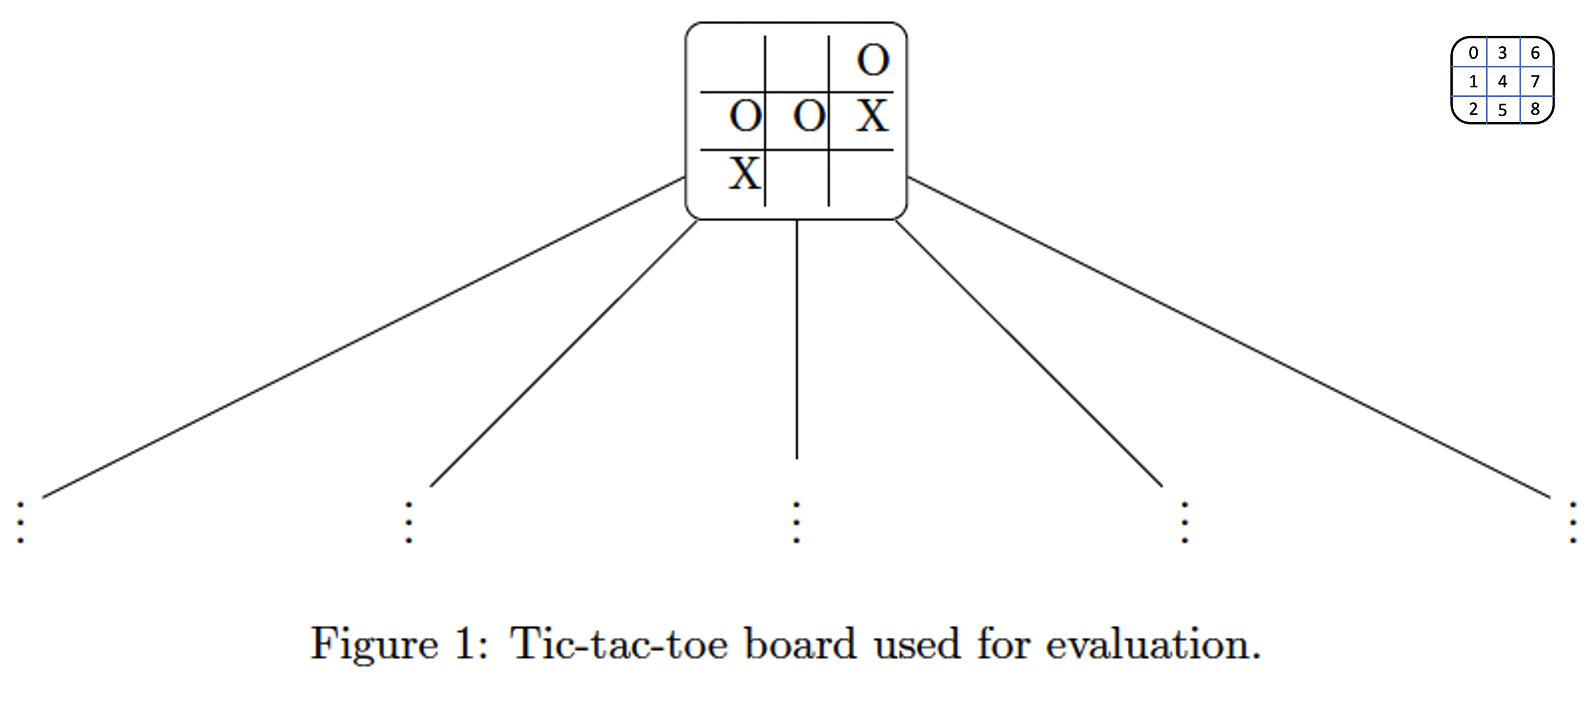

In [252]:
%matplotlib inline
from IPython.display import Image
Image('img/HW4fig1_1.png')

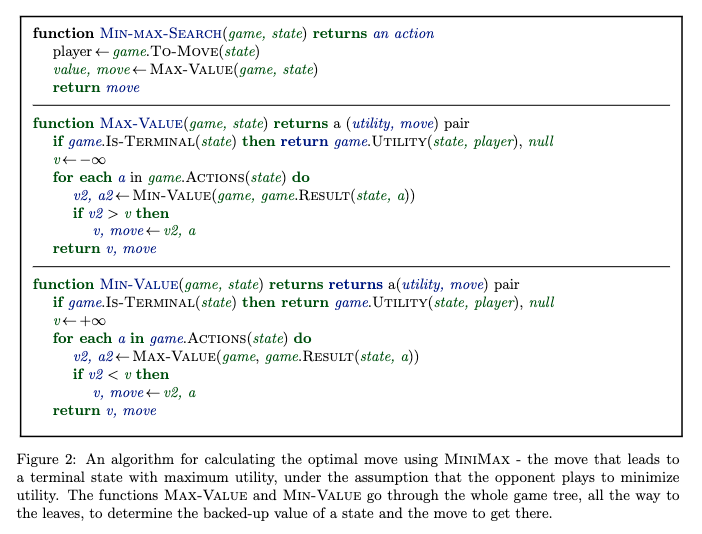

In [253]:
Image('img/HW4fig2.png')

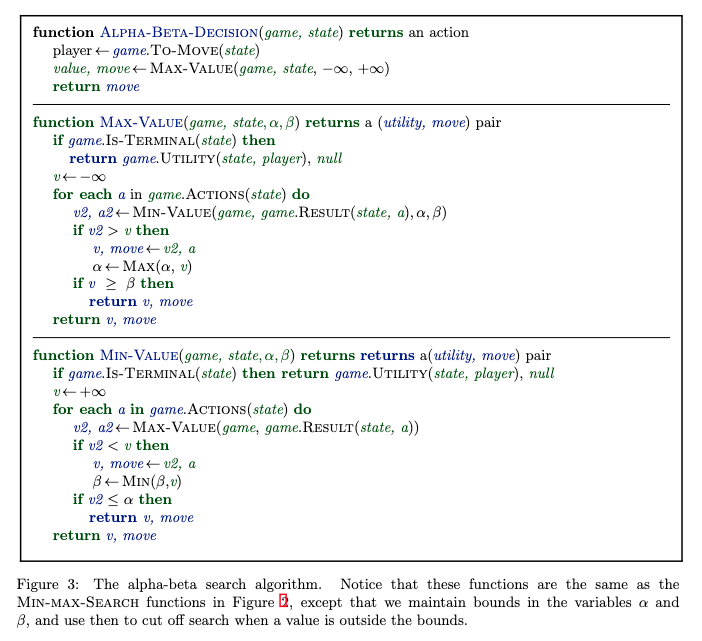

In [254]:
Image('img/HW4fig3.png')

### MinMax Tree

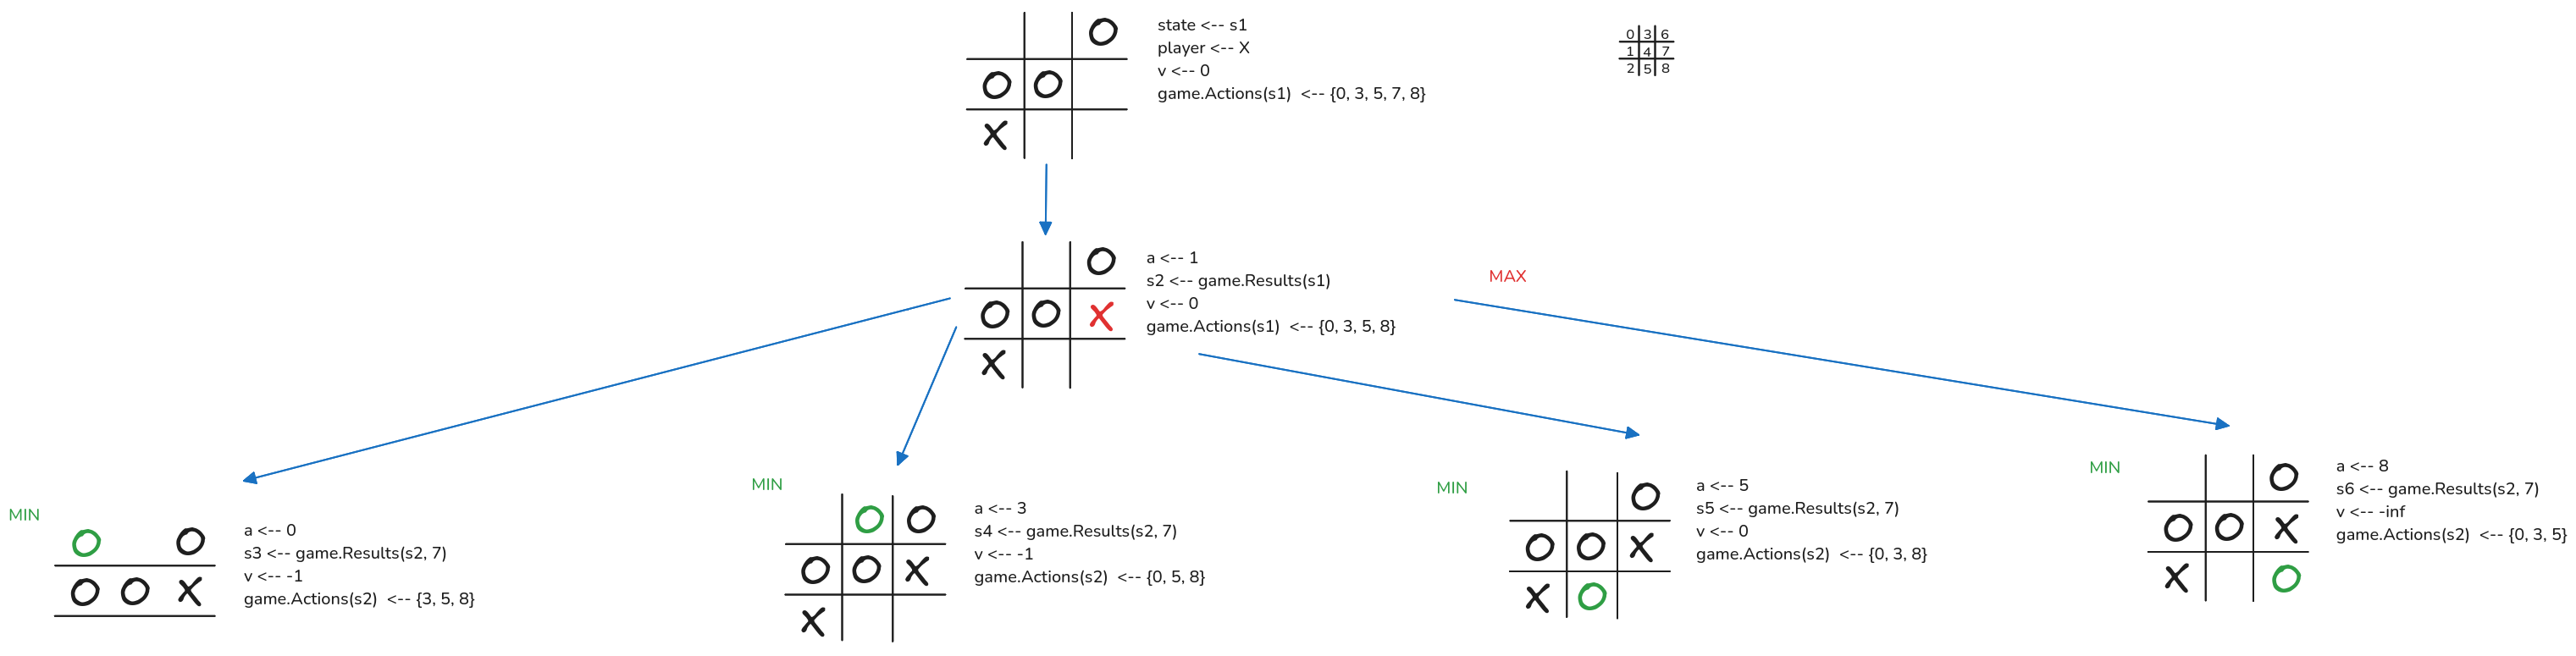

In [267]:
Image('img/HW4-subtree0.png')

For easy viewing, let's look at each sub-tree

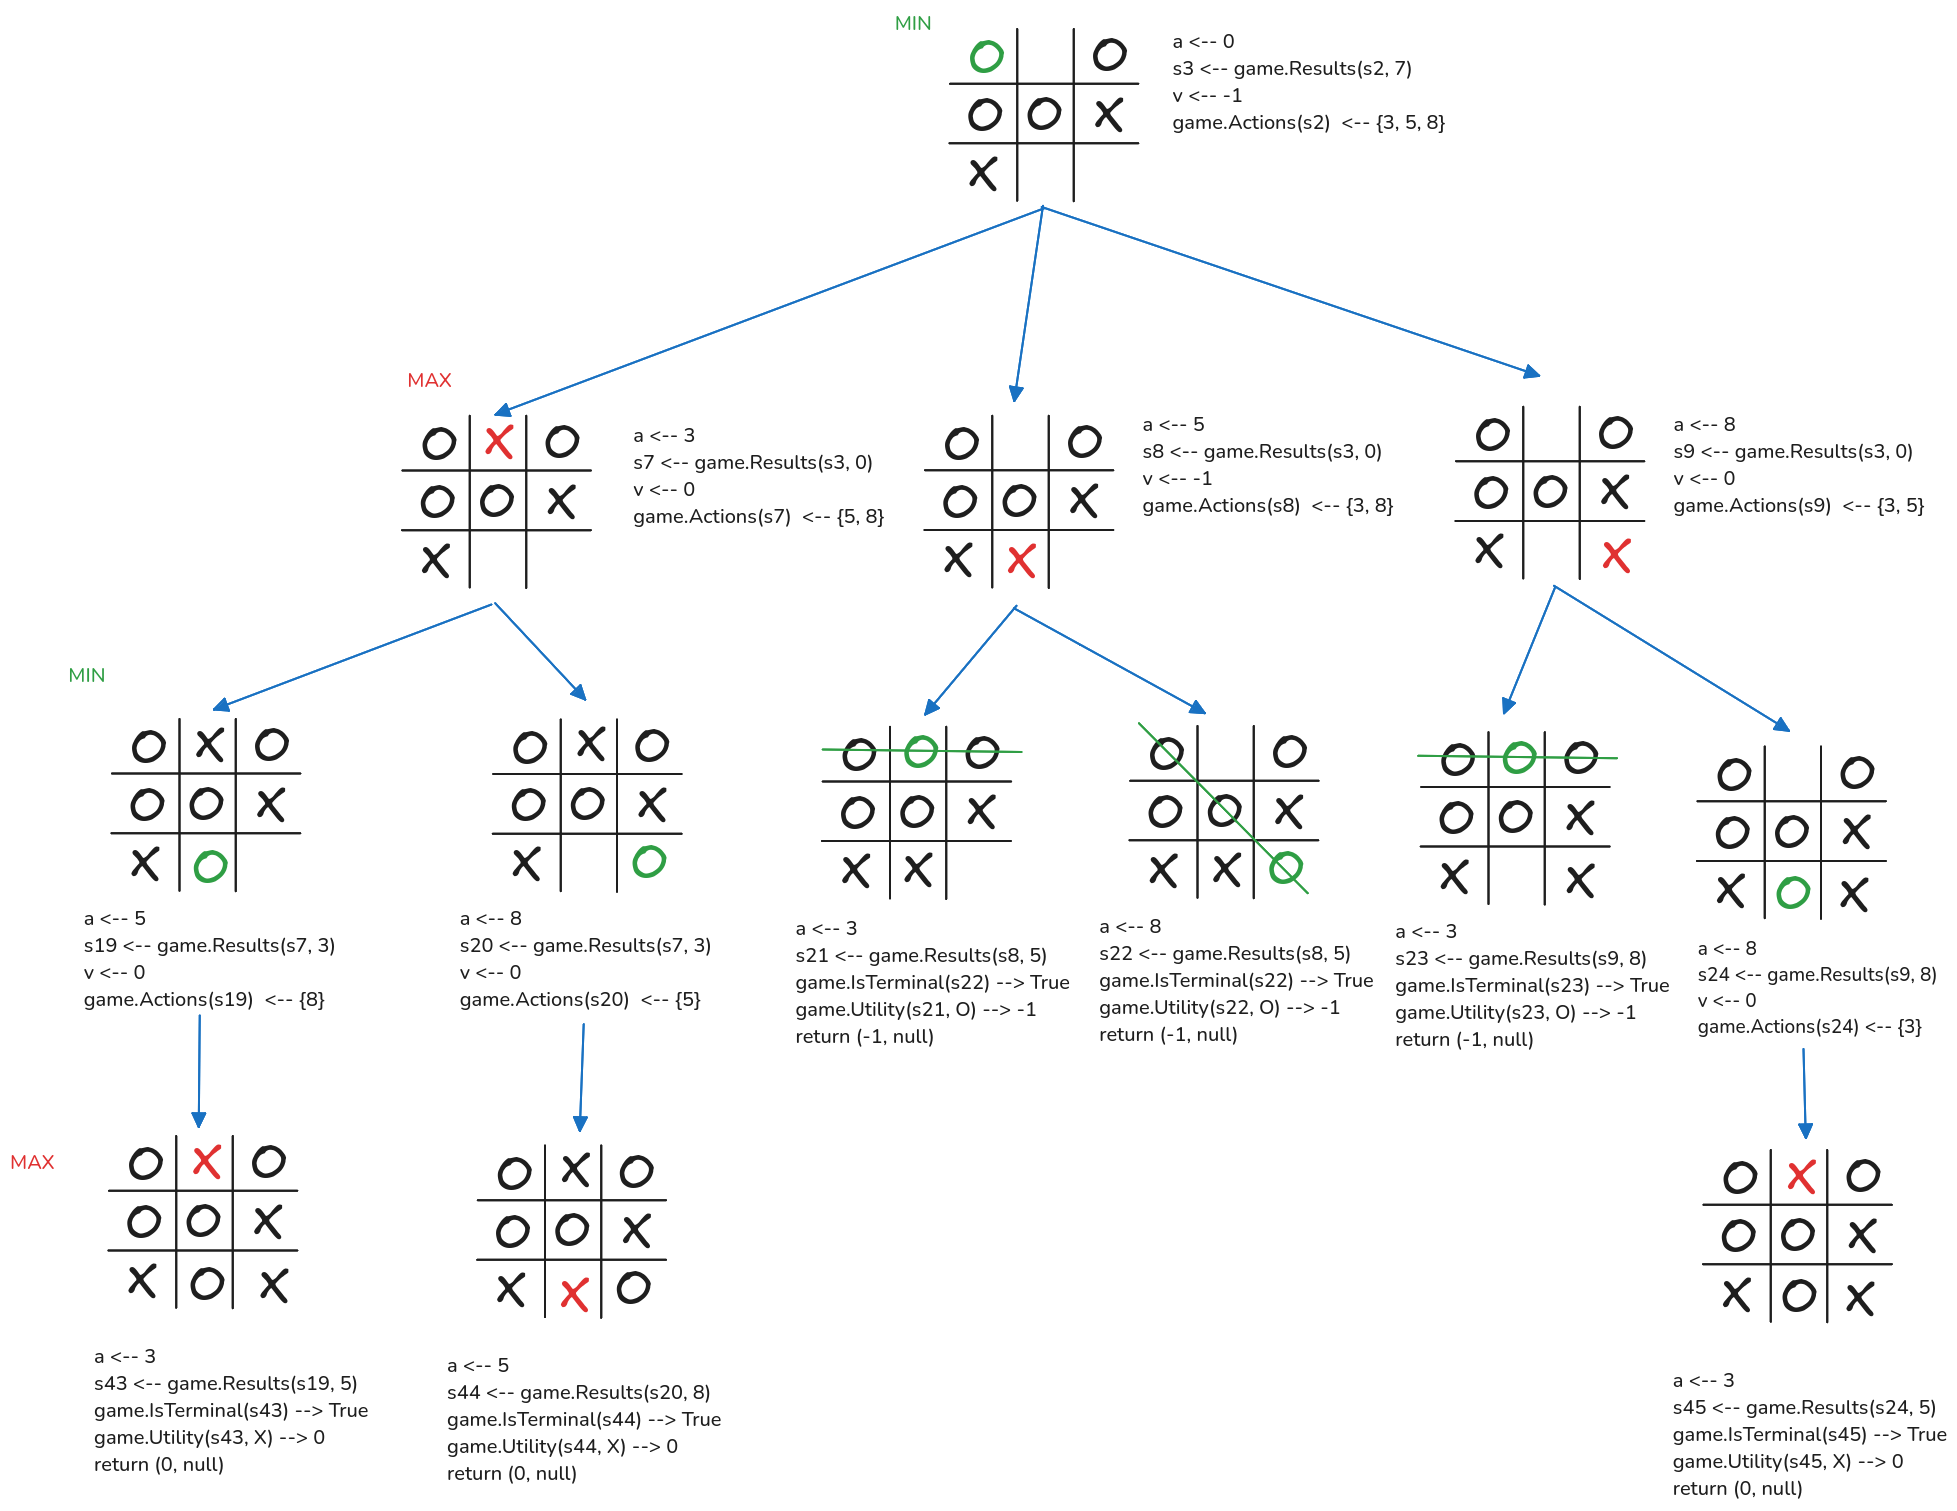

In [262]:

Image('img/HW4-subtree1.png')

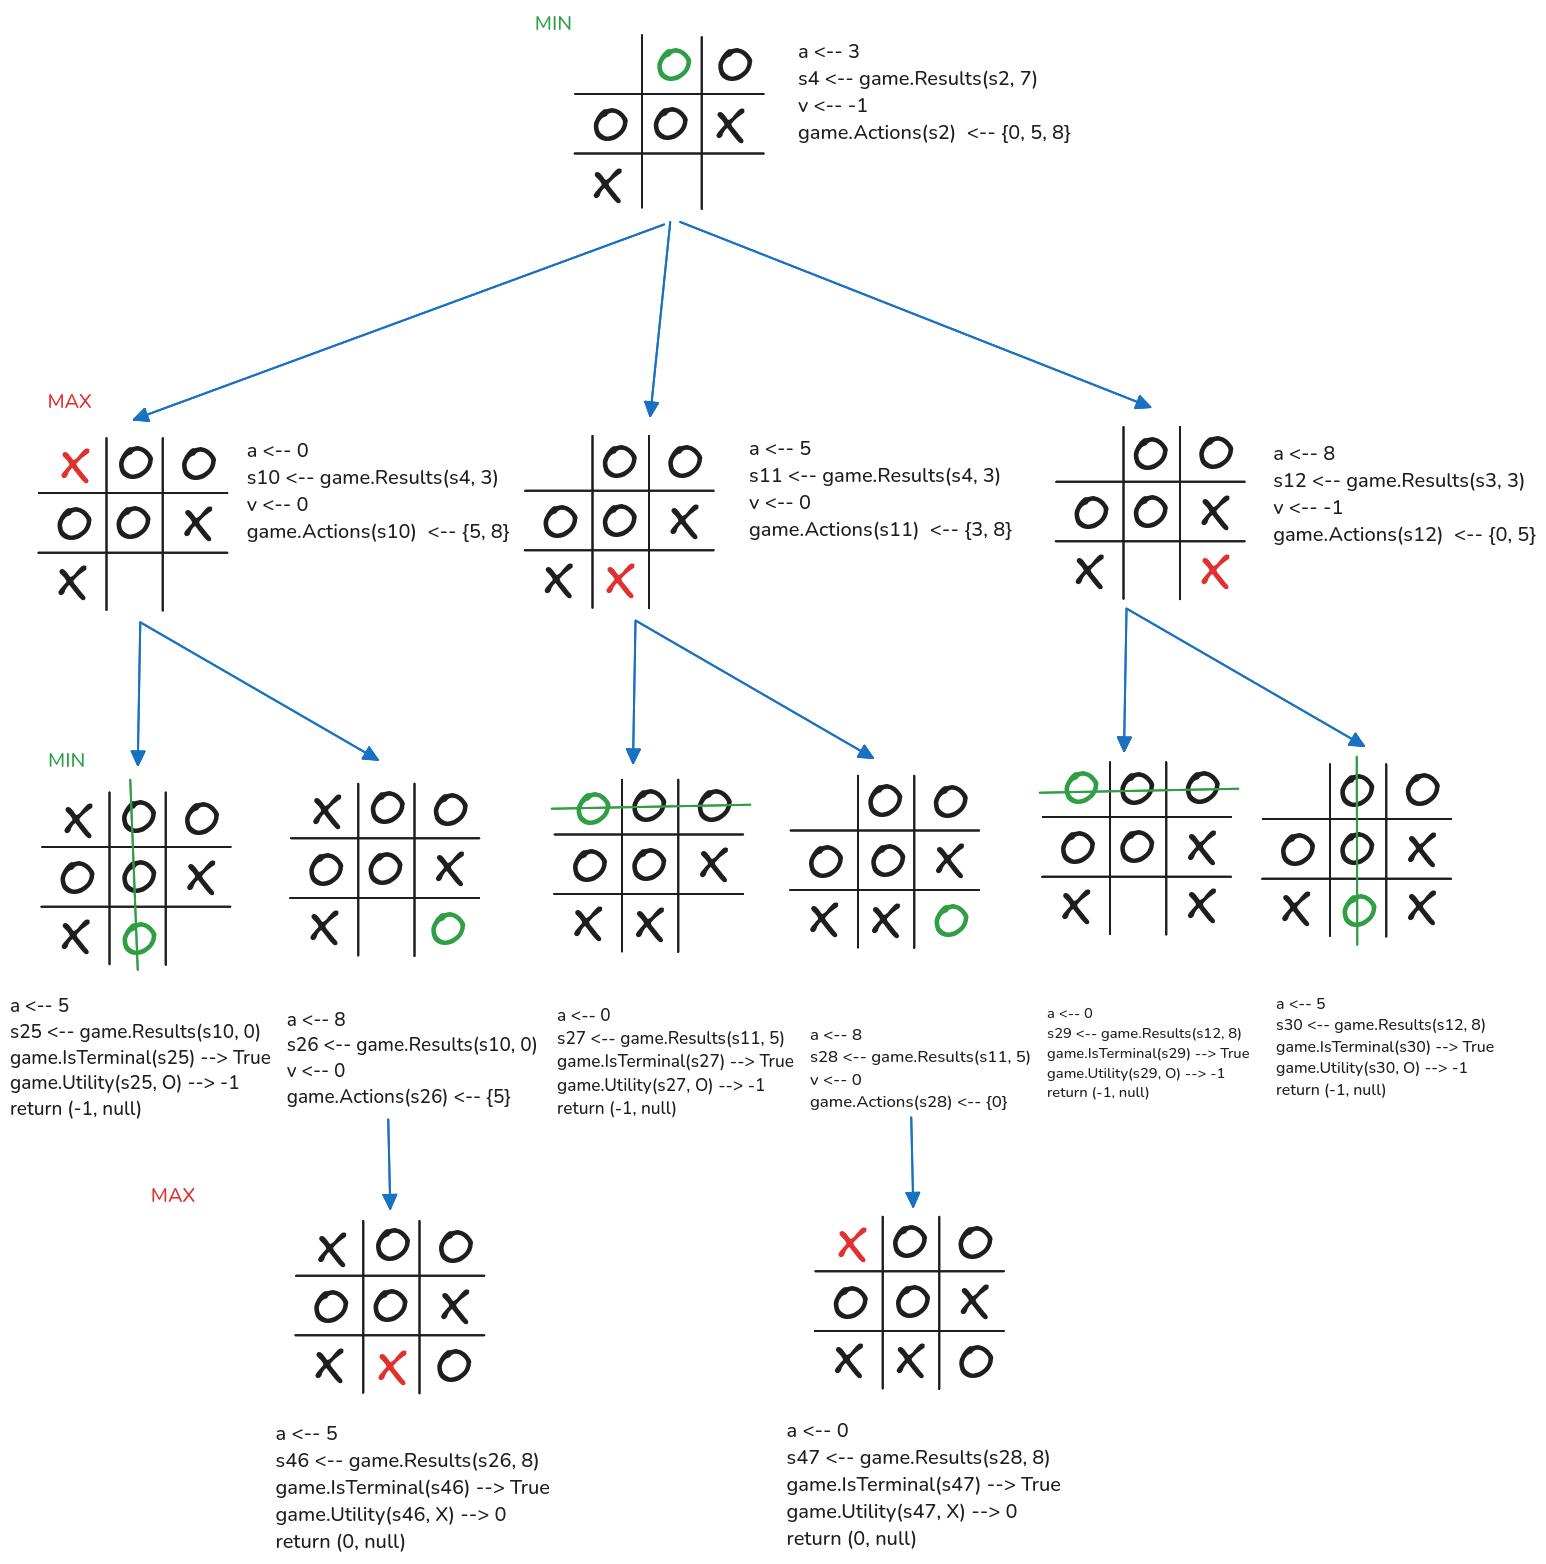

In [263]:
Image('img/HW4-subtree2.png')

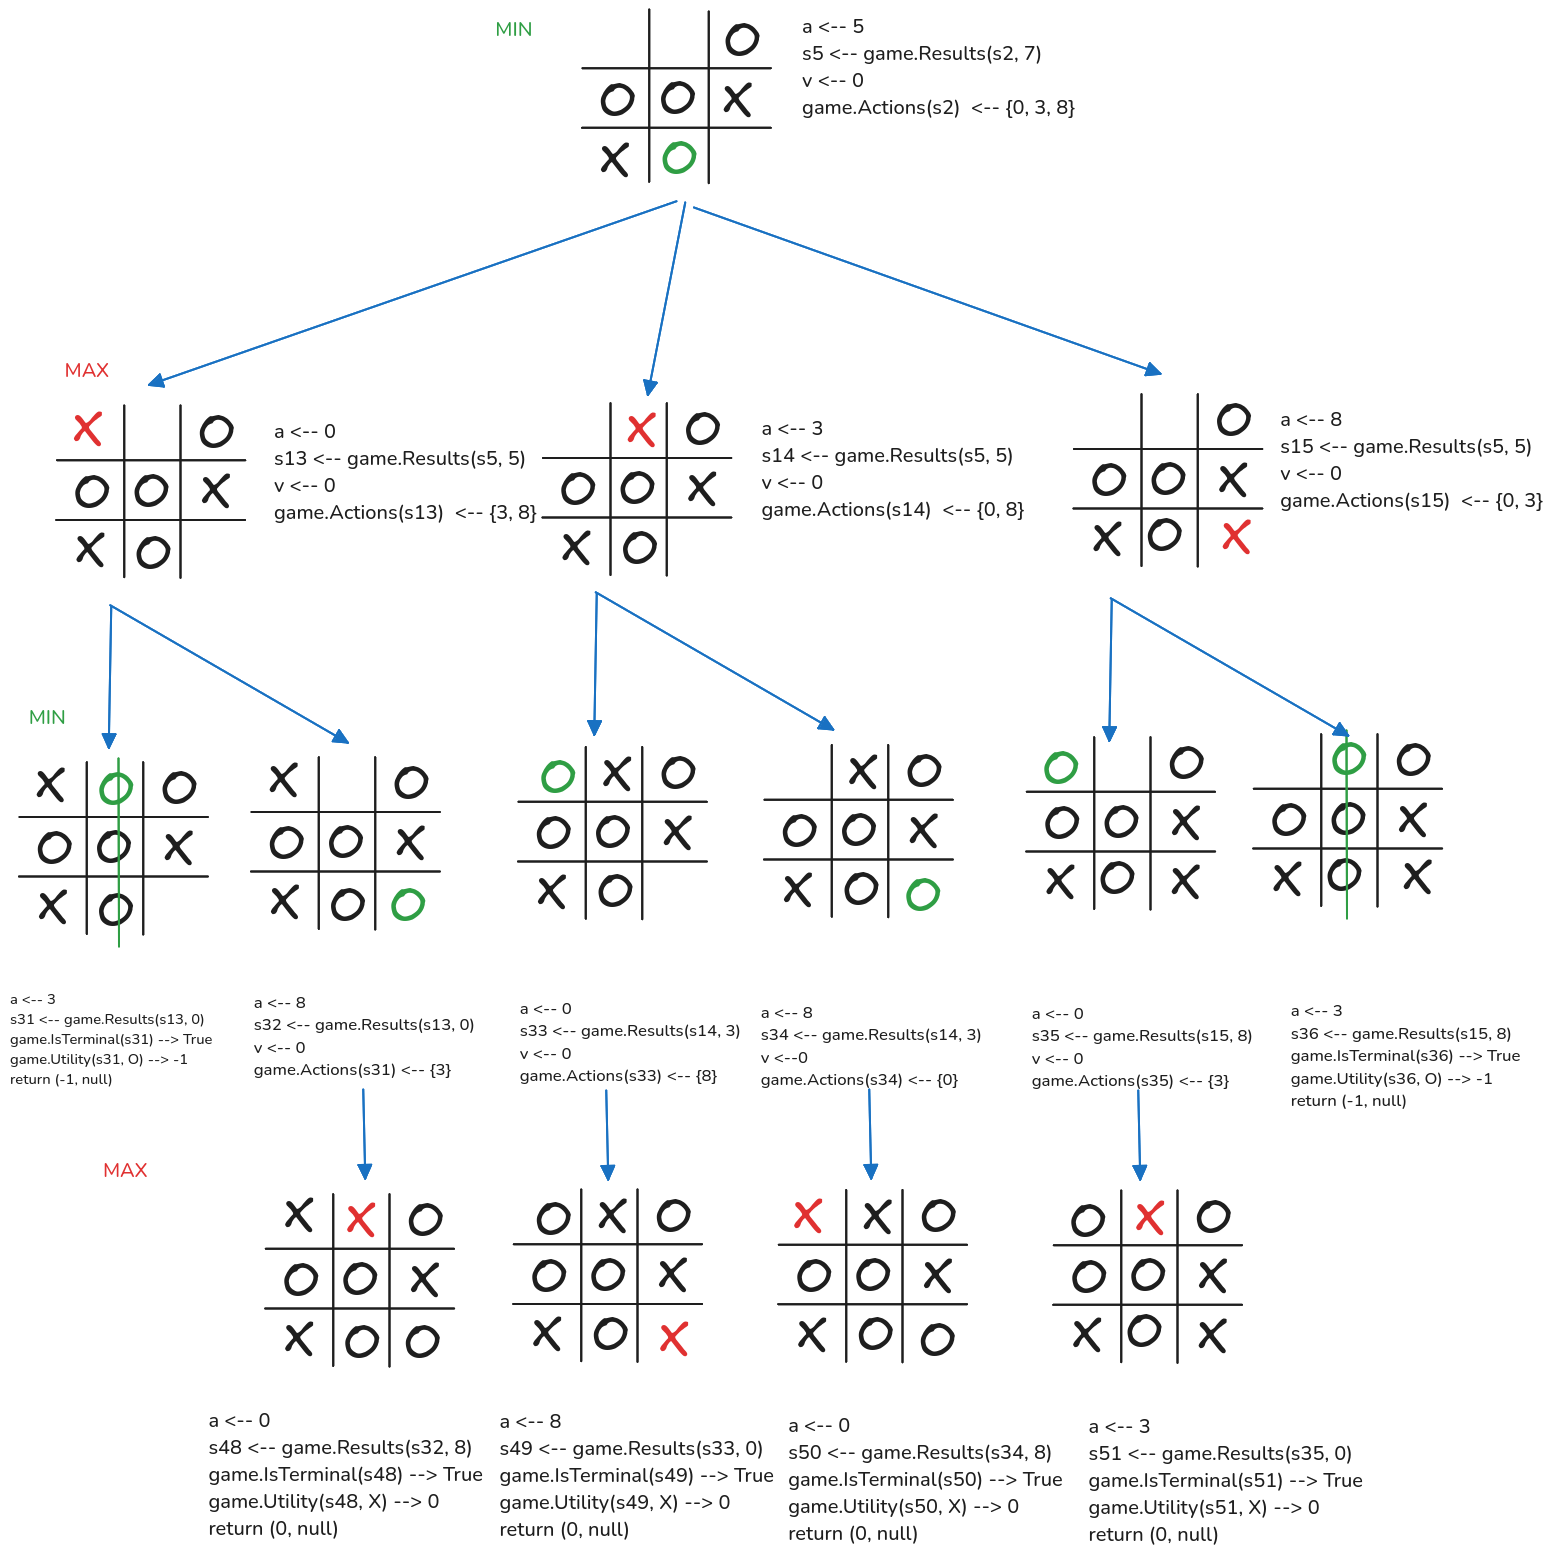

In [264]:
Image('img/HW4-subtree3.png')

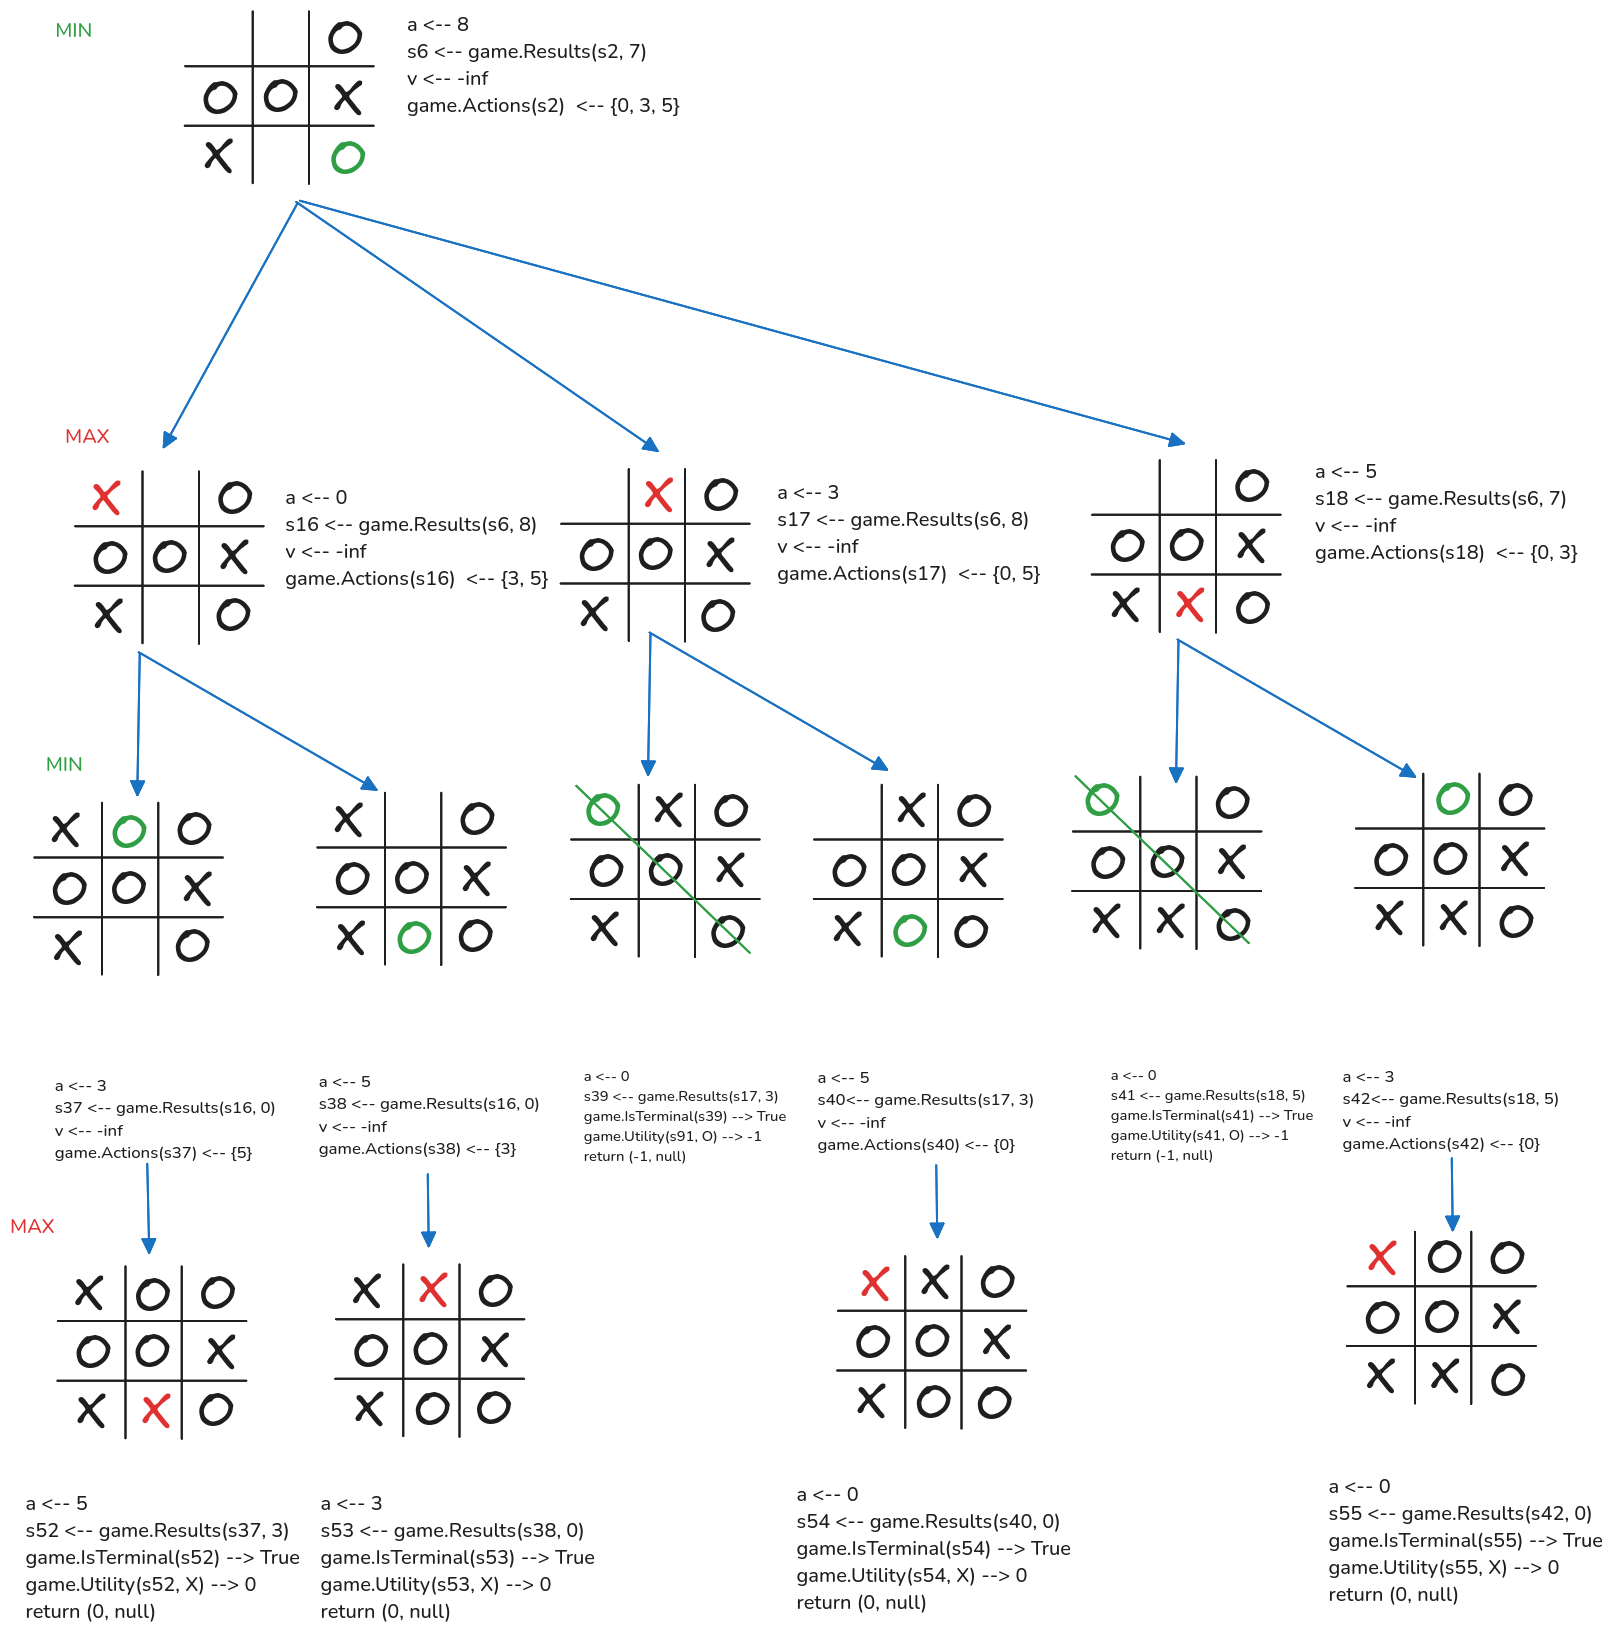

In [266]:
Image('img/HW4-subtree4.png')

### Alpha-Beta Tree

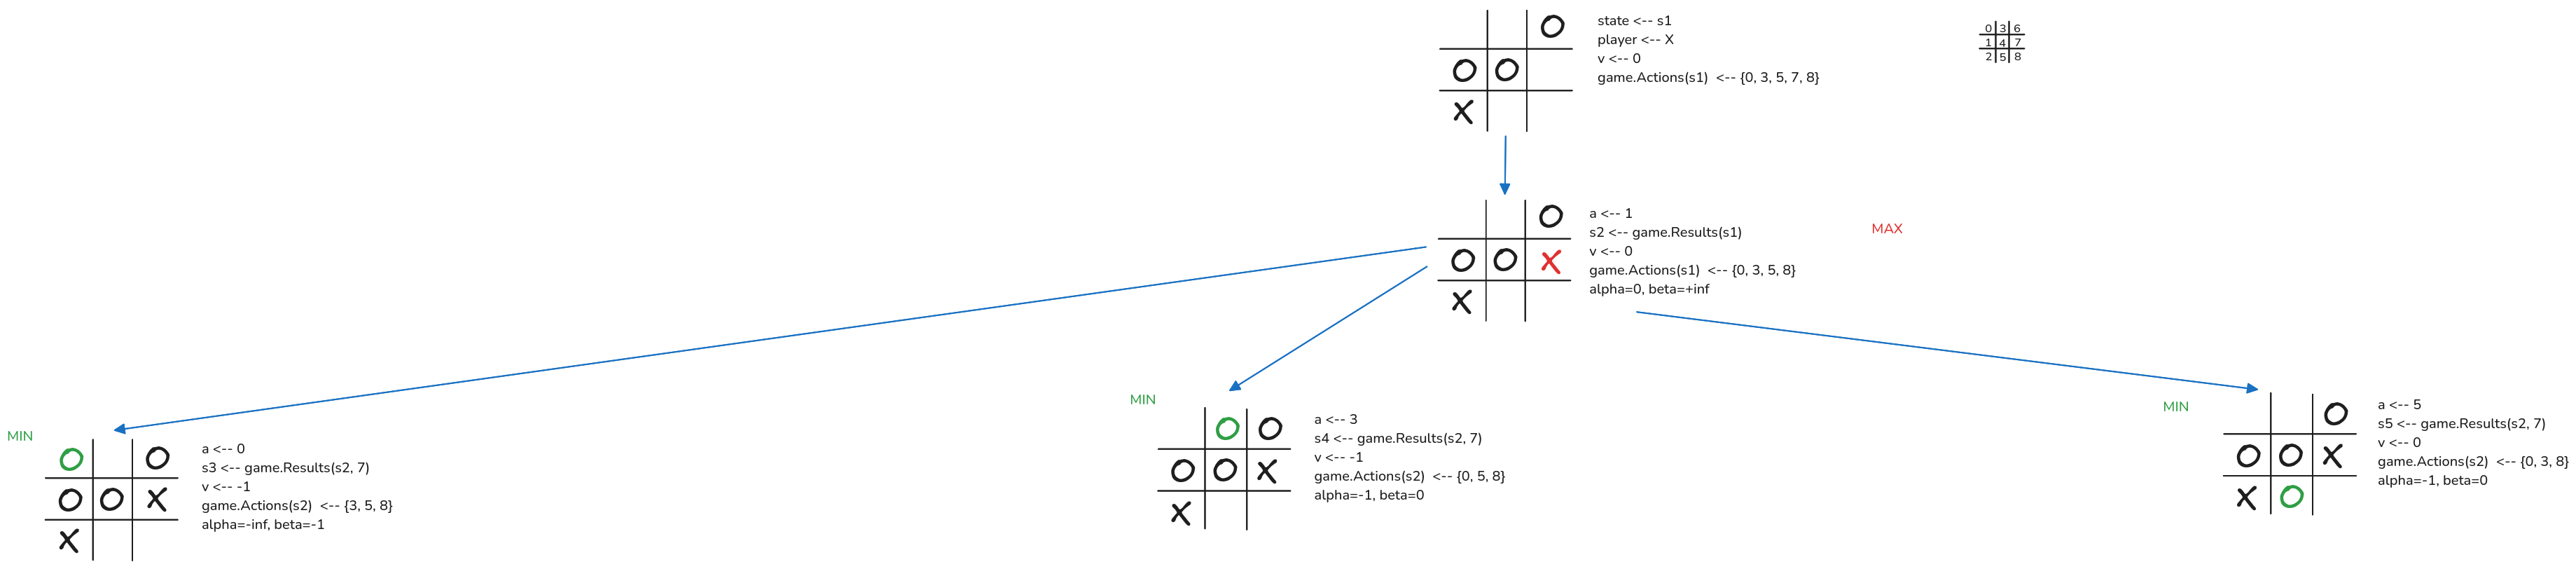

In [268]:
Image('img/HW4-alphabeta-subtree0.png')

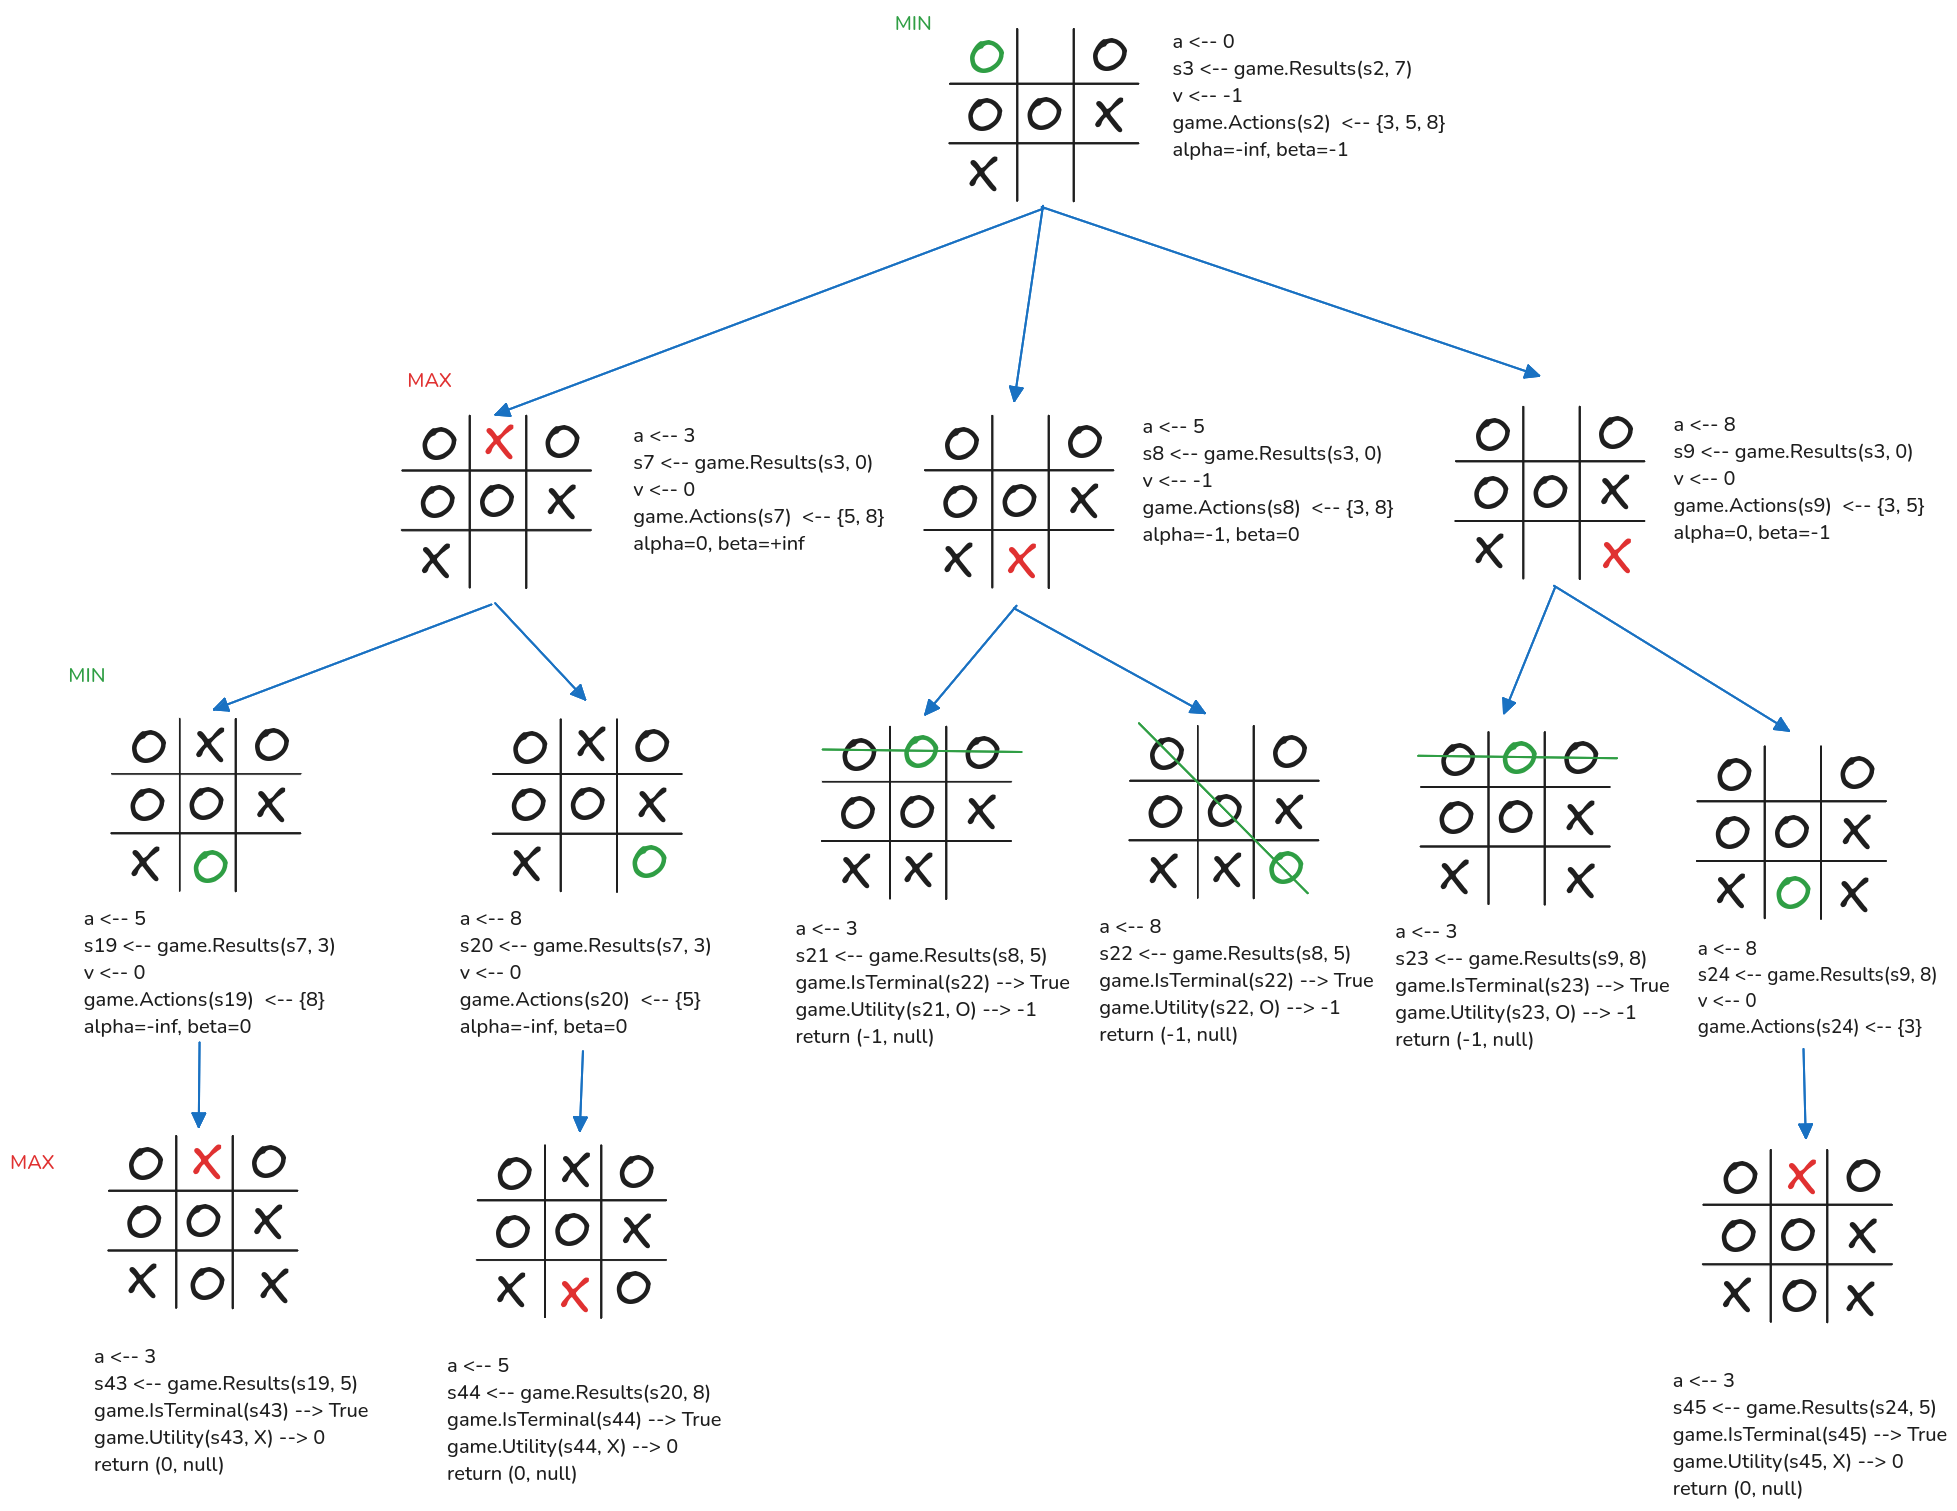

In [269]:
Image('img/HW4-alphabeta-subtree1.png')

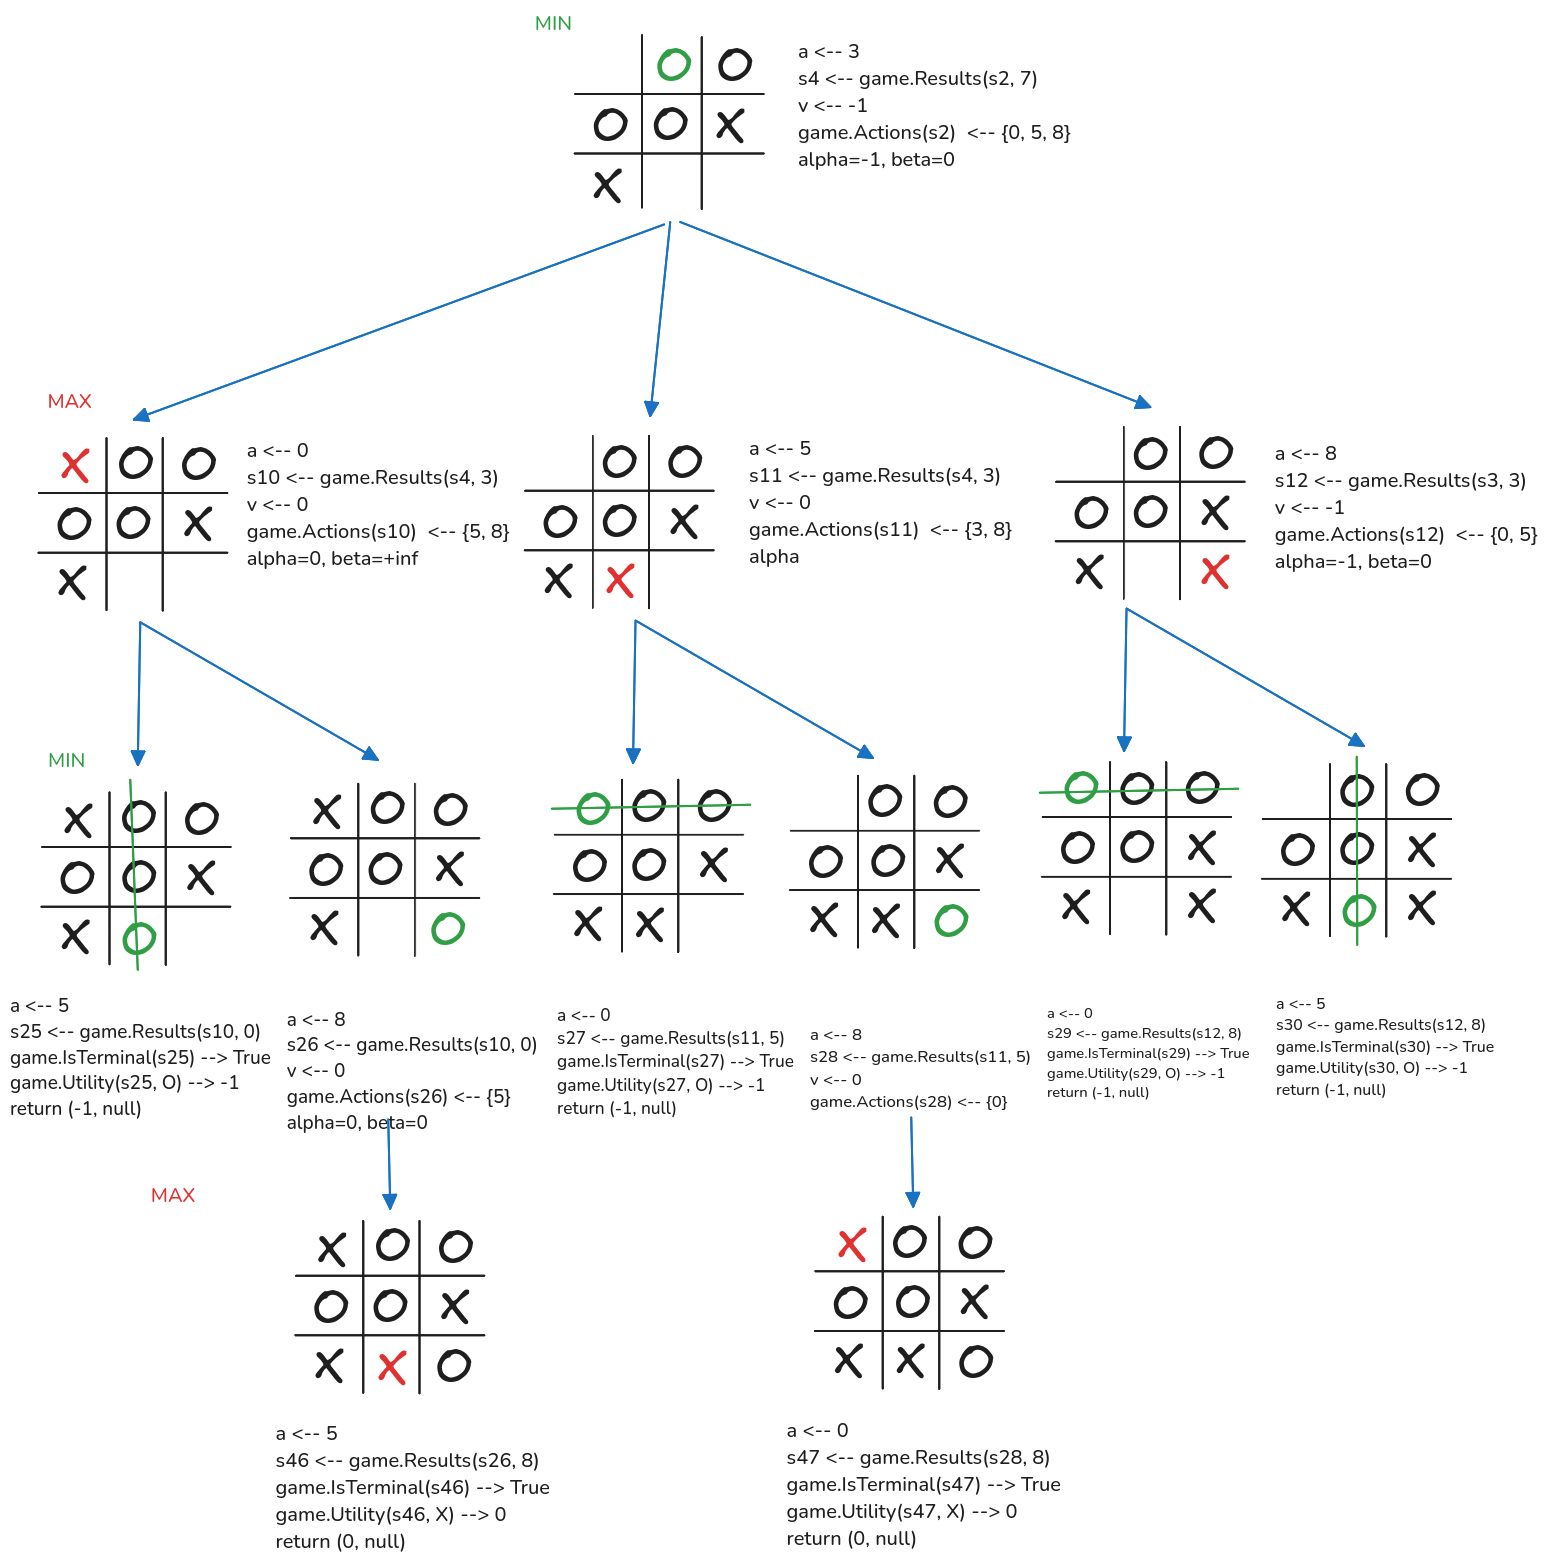

In [270]:
Image('img/HW4-alphabeta-subtree2.png')

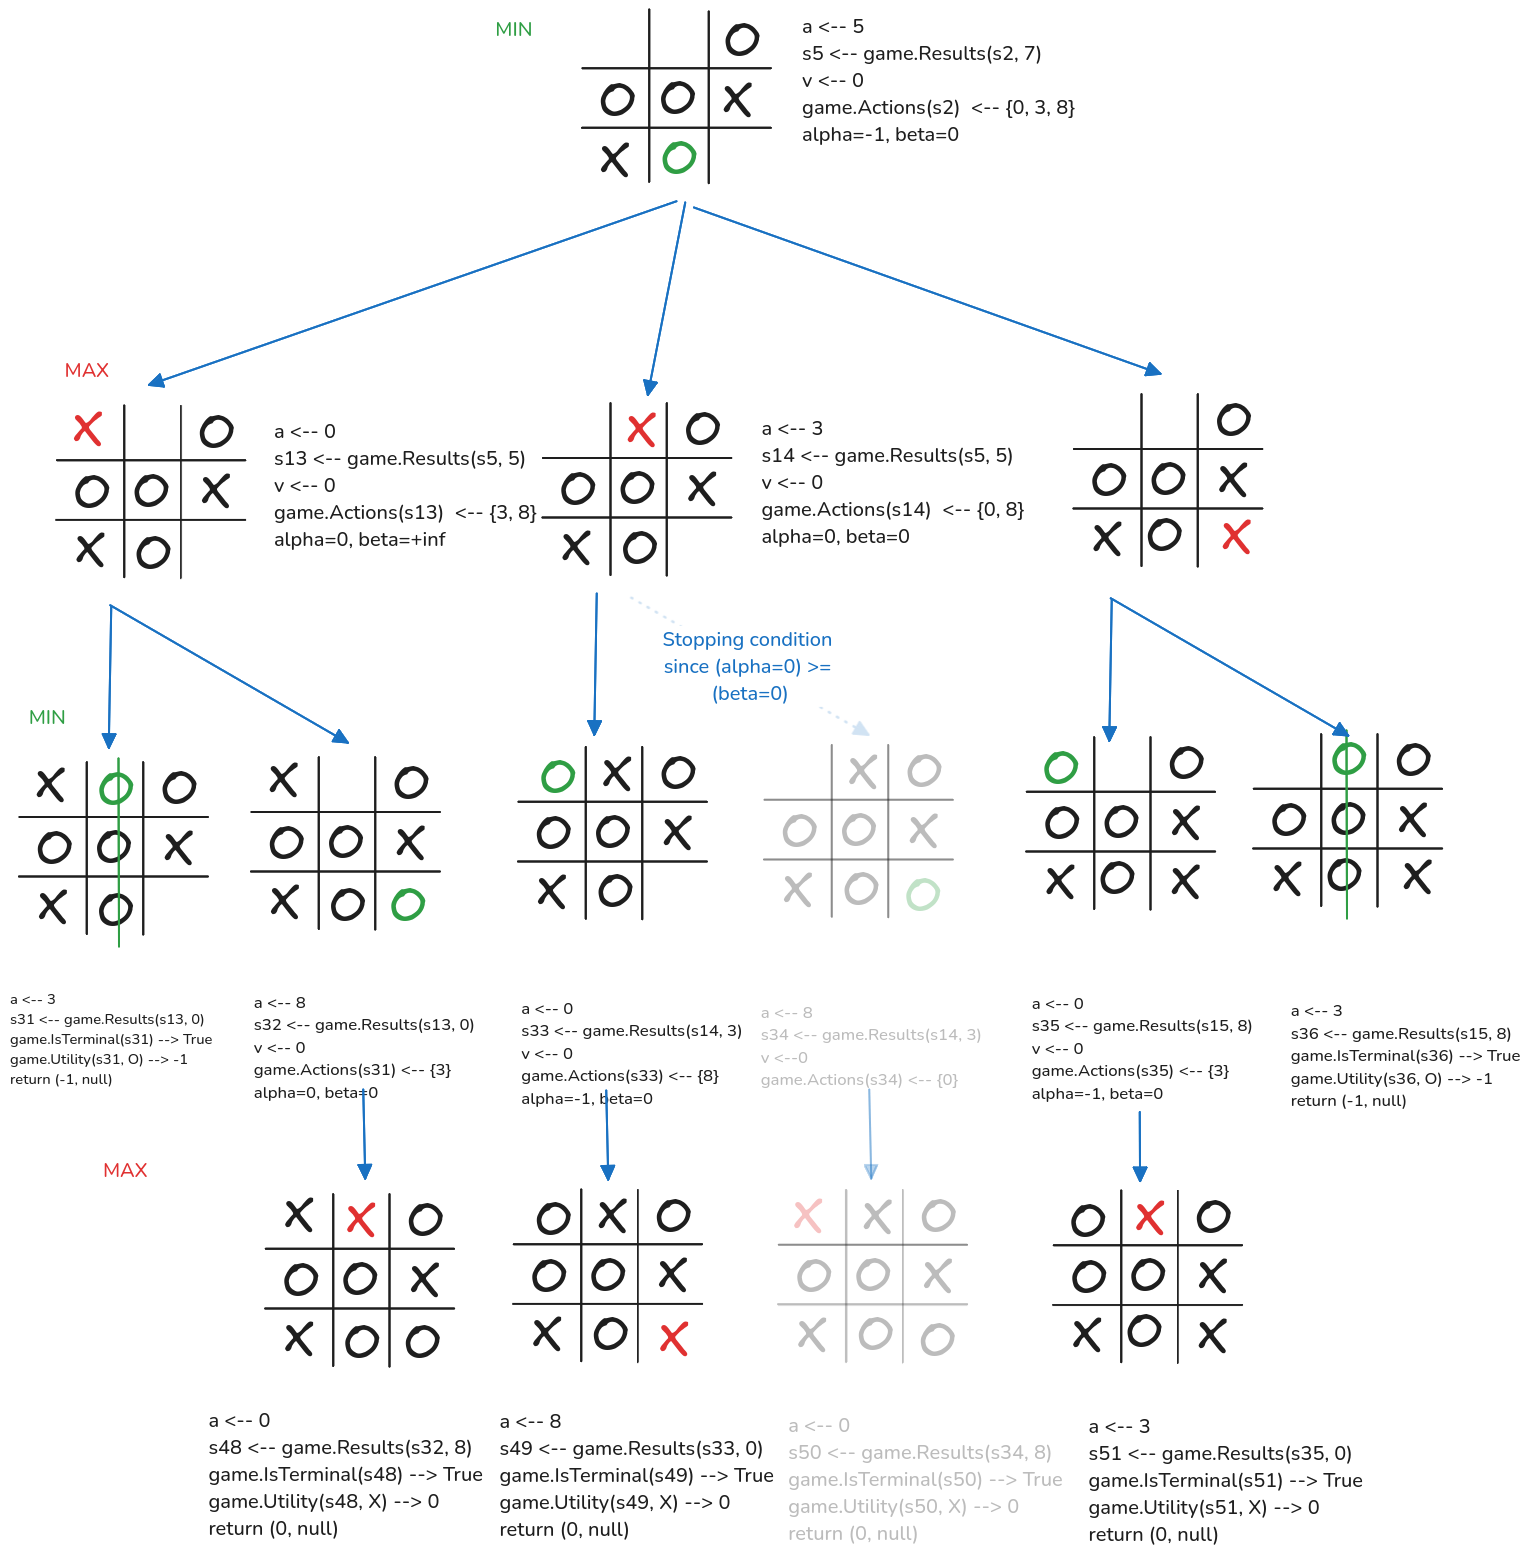

In [271]:
Image('img/HW4-alphabeta-subtree3.png')

For the alpha-beta puned version, note there is not a subtree 4. This is because this subtree was puned due to the alpha-beta condition where `alpha=0` and `beta=0`.